In [1]:
def normalize(df):
    df['세력합'] = df['외인계'] + df['기관계']
    df['기타계'] = df['기타계'] - df['국가']
    
    df = df[::-1]
    
    #누적 수량
    header= ['개인', '세력합', '외인계', '기관계', '금융투자', '사모펀드', '연기금',  '보험', '투신', '은행', '기타금융', '국가', '기타법인', '기타계']
    header1= ['개인누적', '세력합누적', '외국인누적', '기관합누적', '금융투자누적', '사모펀드누적', '연기금누적', '보험누적', '투신누적', '은행누적', '기타금융누적', '국가누적', '기타법인누적', '기타누적']
    df[header1] = df[header].cumsum()
    
    #각 주체별 최소 수량
    header2= ['개인최소', '세력합최소', '외국인최소', '기관합최소', '금융투자최소', '사모펀드최소', '연기금최소', '보험최소', '투신최소', '은행최소', '기타금융최소', '국가최소', '기타법인최소', '기타최소']
    df[header2] = df[header1].cummin()
    
    # 각 주체별 현재 추정 보유 수량
    df['개인수량'] = df['개인누적'] - df['개인최소']
    df['세력합수량'] = df['세력합누적'] - df['세력합최소']
    df['외국인수량'] = df['외국인누적'] - df['외국인최소']
    df['기관합수량'] = df['기관합누적'] - df['기관합최소']
    df['금융투자수량'] = df['금융투자누적'] - df['금융투자최소']
    df['사모펀드수량'] = df['사모펀드누적'] - df['사모펀드최소']
    df['연기금수량'] = df['연기금누적'] - df['연기금최소']
    df['보험수량'] = df['보험누적'] - df['보험최소']
    df['투신수량'] = df['투신누적'] - df['투신최소']
    df['은행수량'] = df['은행누적'] - df['은행최소']
    df['기타금융수량'] = df['기타금융누적'] - df['기타금융최소']
    df['국가수량'] = df['국가누적'] - df['국가최소']
    df['기타법인수량'] = df['기타법인누적'] - df['기타법인최소']
    df['기타수량'] = df['기타누적'] - df['기타최소']
    
    # 각 주체별 최고 고점 수량
    header3 = ['개인수량', '세력합수량', '외국인수량', '기관합수량', '금융투자수량', '사모펀드수량', '연기금수량', '보험수량', '투신수량', '은행수량', '기타금융수량', '국가수량', '기타법인수량', '기타수량']
    header4= ['개인고점', '세력합고점', '외국인고점', '기관합고점', '금융투자고점', '사모펀드고점', '연기금고점', '보험고점', '투신고점', '은행고점', '기타금융고점', '국가고점', '기타법인고점', '기타고점']
    df[header4] = df[header3].cummax()
    
    # 각 주체별 분산 비율(정규화)
    df['개인분산'] = df['개인수량']/df['개인고점']
    df['세력합분산'] = df['세력합수량']/df['세력합고점']
    df['외국인분산'] = df['외국인수량']/df['외국인고점']
    df['기관합분산'] = df['기관합수량']/df['기관합고점']
    df['금융투자분산'] = df['금융투자수량']/df['금융투자고점']
    df['사모펀드분산'] = df['사모펀드수량']/df['사모펀드고점']
    df['연기금분산'] = df['연기금수량']/df['연기금고점']
    df['보험분산'] = df['보험수량']/df['보험고점']
    df['투신분산'] = df['투신수량']/df['투신고점']
    df['기타금융분산'] = df['기타금융수량']/df['기타금융고점']
    df['은행분산'] = df['은행수량']/df['은행고점']
    df['국가분산'] = df['국가수량']/df['국가고점']
    df['기타법인분산'] = df['기타법인수량']/df['기타법인고점']
    df['기타분산'] = df['기타수량']/df['기타고점']
    
    header4= ['개인분산', '세력합분산', '외국인분산', '기관합분산', '금융투자분산', '사모펀드분산', '연기금분산', '보험분산', '투신분산', '은행분산', '기타금융분산', '국가분산', '기타법인분산', '기타분산']
    normdf = df[header4]
    
    return normdf

In [2]:
%matplotlib inline
import sqlite3
import pandas as pd
import warnings
from tqdm import tqdm_notebook

warnings.filterwarnings('ignore')

In [3]:
with sqlite3.connect("D:/code/db/investor.sqlite") as con:
            # db 테이블 모두 읽어 오기
            cursor = con.cursor()
            cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
            tablelist = cursor.fetchall()
            tableList = [tb[0] for tb in tablelist]
            result = []
            
            for i in tqdm_notebook(tableList):
                orgdf = pd.read_sql(f"SELECT 일자, 종가, 개인, 증권 as 금융투자, 사모펀드, 기금 as 연기금, 보험, 투신, 은행, 종금 as 기타금융, 국가외 as 국가, 기타법인, 기관 as 기관계, 외인계, 기타계 FROM '{i}' ORDER BY 일자 DESC", con, index_col='일자', parse_dates={'일자': '%Y-%m-%d'})
                newdf = normalize(orgdf)
                newdf['종목명'] = i
                lst = newdf.iloc[-1]
                result.append(lst)

In [4]:
columns = ['개인분산', '세력합분산', '외국인분산', '기관합분산', '금융투자분산', '사모펀드분산', '연기금분산', '보험분산', '투신분산', '은행분산', '기타금융분산', '국가분산', '기타법인분산', '기타분산', '종목명']
finaldf = pd.DataFrame(data=result, columns=columns)

In [15]:
#finaldf.index = finaldf.strftime?

Object `finaldf.strftime` not found.


In [5]:
finaldf = finaldf.reset_index()

In [6]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
index     50 non-null datetime64[ns]
개인분산      50 non-null float64
세력합분산     50 non-null float64
외국인분산     50 non-null float64
기관합분산     50 non-null float64
금융투자분산    50 non-null float64
사모펀드분산    50 non-null float64
연기금분산     50 non-null float64
보험분산      50 non-null float64
투신분산      50 non-null float64
은행분산      50 non-null float64
기타금융분산    50 non-null float64
국가분산      48 non-null float64
기타법인분산    50 non-null float64
기타분산      50 non-null float64
종목명       50 non-null object
dtypes: datetime64[ns](1), float64(14), object(1)
memory usage: 6.1+ KB


In [7]:
finaldf = finaldf.rename(index=str, columns={"index": "일자"})

In [8]:
finaldf.to_excel('./수급분석/data/분산비율20190416.xlsx', sheet_name='Sheet1')

In [9]:
with sqlite3.connect("D:/code/db/statics.sqlite") as conn:
    finaldf.to_sql('분산비율', con=conn, if_exists='append', index=0)

In [10]:
finaldf[finaldf['개인분산'] > 0.8]

,일자,개인분산,세력합분산,외국인분산,기관합분산,금융투자분산,사모펀드분산,연기금분산,보험분산,투신분산,은행분산,기타금융분산,국가분산,기타법인분산,기타분산,종목명
2,2019-04-16,0.851581,0.158756,0.429319,0.051048,0.427258,0.285181,0.493057,0.106263,0.000000,0.122744,0.120544,0.008953,0.246423,0.246423,LG하우시스
7,2019-04-16,0.934613,0.540462,0.370285,0.287122,1.000000,0.012150,0.692382,0.305100,0.136409,0.041614,0.000648,0.008998,0.000023,0.000023,쌍용차
9,2019-04-16,0.897082,0.132608,0.715290,0.052729,0.452040,0.203413,0.309849,0.231005,0.230752,0.000084,0.082448,0.118779,0.207883,0.207883,아시아나항공
13,2019-04-16,0.897349,0.283136,0.750844,0.366742,0.000000,0.059030,0.815113,0.692517,0.527022,0.344253,0.000000,0.000000,0.605645,0.605645,티웨이항공
14,2019-04-16,0.813497,0.416488,0.170844,0.658979,0.848387,0.267973,0.532157,0.199725,0.062668,0.964857,0.217186,0.763775,0.281816,0.281816,파라다이스
22,2019-04-16,0.824033,0.371018,0.405622,0.490312,0.963997,0.346945,0.606339,0.443885,0.033006,0.077626,0.301186,0.002976,0.647637,0.647637,LG디스플레이
29,2019-04-16,0.945489,0.078019,0.007263,0.903858,0.510784,0.877612,0.927775,0.370930,0.600954,0.043517,0.000218,0.073358,0.885968,0.885968,BGF
37,2019-04-16,0.875384,0.038289,0.511721,0.470579,0.250564,0.353392,0.354863,0.428862,0.594900,0.283860,0.281657,0.448285,0.999863,0.999863,DGB금융지주
40,2019-04-16,0.848349,0.000000,0.768974,0.000000,0.742698,0.880278,0.128188,0.021252,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,우리금융지주
41,2019-04-16,0.955325,0.055610,0.091484,0.959267,0.989367,0.488572,0.035540,0.016203,0.852698,0.155776,0.047634,0.155947,0.417767,0.417767,인터파크


In [11]:
finaldf[finaldf['외국인분산'] < 0.3]

,일자,개인분산,세력합분산,외국인분산,기관합분산,금융투자분산,사모펀드분산,연기금분산,보험분산,투신분산,은행분산,기타금융분산,국가분산,기타법인분산,기타분산,종목명
6,2019-04-16,0.542383,0.778275,0.287585,0.993840,0.903478,0.804286,0.850247,0.994135,1.000000,0.146982,0.462739,0.965981,0.880144,0.880144,만도
8,2019-04-16,0.758316,0.705542,0.046024,0.886144,0.033469,0.873675,0.305110,0.575512,0.407687,0.638834,0.035857,0.019017,0.333010,0.333010,아스트
14,2019-04-16,0.813497,0.416488,0.170844,0.658979,0.848387,0.267973,0.532157,0.199725,0.062668,0.964857,0.217186,0.763775,0.281816,0.281816,파라다이스
17,2019-04-16,0.768732,0.281681,0.126050,0.663302,0.958027,0.523868,0.760048,0.900262,0.317368,0.719546,0.314653,0.086641,0.003449,0.003449,하이트진로
24,2019-04-16,0.445238,0.869569,0.234029,0.847040,0.000722,0.513514,0.892167,0.053547,0.544766,0.995340,0.178964,0.706856,0.918789,0.918789,한미반도체
26,2019-04-16,0.538394,0.480371,0.072233,1.000000,0.906091,0.711163,1.000000,0.999928,0.878798,0.746651,0.847153,0.315520,0.986733,0.986733,동서
29,2019-04-16,0.945489,0.078019,0.007263,0.903858,0.510784,0.877612,0.927775,0.370930,0.600954,0.043517,0.000218,0.073358,0.885968,0.885968,BGF
38,2019-04-16,0.133270,0.876990,0.000000,0.991343,0.841409,1.000000,0.984927,0.917777,1.000000,0.628182,0.947124,NaN,0.962517,0.962517,F&F
41,2019-04-16,0.955325,0.055610,0.091484,0.959267,0.989367,0.488572,0.035540,0.016203,0.852698,0.155776,0.047634,0.155947,0.417767,0.417767,인터파크


In [12]:
finaldf[finaldf['기관합분산'] < 0.3]

,일자,개인분산,세력합분산,외국인분산,기관합분산,금융투자분산,사모펀드분산,연기금분산,보험분산,투신분산,은행분산,기타금융분산,국가분산,기타법인분산,기타분산,종목명
2,2019-04-16,0.851581,0.158756,0.429319,0.051048,0.427258,0.285181,0.493057,0.106263,0.000000,0.122744,0.120544,0.008953,0.246423,0.246423,LG하우시스
3,2019-04-16,0.000000,1.000000,1.000000,0.031022,0.303647,0.320784,0.832072,0.338397,0.024310,0.002990,0.002265,0.005700,0.946725,0.946725,기아차
7,2019-04-16,0.934613,0.540462,0.370285,0.287122,1.000000,0.012150,0.692382,0.305100,0.136409,0.041614,0.000648,0.008998,0.000023,0.000023,쌍용차
9,2019-04-16,0.897082,0.132608,0.715290,0.052729,0.452040,0.203413,0.309849,0.231005,0.230752,0.000084,0.082448,0.118779,0.207883,0.207883,아시아나항공
16,2019-03-22,0.577047,0.513879,0.921304,0.051562,0.796206,0.046593,0.266255,0.184729,0.027088,0.087212,0.541293,0.433748,0.447453,0.447453,포스코켐텍
30,2019-04-16,0.753331,0.589409,0.763622,0.142358,0.992800,0.000000,0.615747,0.209400,0.184266,0.313712,0.000000,0.328972,0.472022,0.472022,CJ
33,2019-04-16,0.750397,0.354959,1.000000,0.000000,0.954658,0.000253,0.080797,0.000000,0.002478,0.002394,0.453638,0.412342,0.348074,0.348074,CJ헬로
40,2019-04-16,0.848349,0.000000,0.768974,0.000000,0.742698,0.880278,0.128188,0.021252,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,우리금융지주
44,2019-04-16,0.570576,0.306720,0.657857,0.060706,0.583201,0.579783,0.722643,0.525073,0.035585,0.037081,0.970494,0.056021,0.964462,0.964462,미래에셋대우
46,2019-04-16,0.929050,0.072031,0.349641,0.095797,0.159056,0.063461,0.893521,0.007944,0.014392,0.000000,0.221455,0.031936,0.178098,0.178098,코오롱인더


In [15]:
len(tableList)

50

In [22]:
halftableList = tableList[0:25]

In [19]:
len(halftableList)

25

In [21]:
import FinanceDataReader as fdr
fdr.__version__

'0.7.2'

In [25]:
with sqlite3.connect("C:/Users/indiesoul/mymoneybot-ebest_20181210(V16)/DATA/mymoneybot.sqlite") as con:
    masterdf = pd.read_sql("select 종목명, 단축코드 from '종목코드'", con, index_col=None)

In [27]:
selectdf1 = masterdf[masterdf['종목명'].isin(halftableList)]

In [29]:
selectdf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 106 to 2209
Data columns (total 2 columns):
종목명     23 non-null object
단축코드    23 non-null object
dtypes: object(2)
memory usage: 368.0+ bytes


In [43]:
tickers = list(selectdf1['단축코드'])
tickers.append('ks11')
tickername = list(selectdf1['종목명'])
tickername.append('kospi')

In [44]:
start = "2010-01-03"
all_data = {}
for ticker in tqdm_notebook(tickers, desc="ticker종가", mininterval=1):
    all_data[ticker] = fdr.DataReader(ticker,start).Close

In [45]:
prices = pd.DataFrame(all_data)
prices.columns = [tickername]

In [46]:
prices.head()

,하이트진로,기아차,JW중외제약,쌍용차,한화케미칼,현대위아,한화에어로스페이스,한국전력,아시아나항공,롯데쇼핑,...,한국항공우주,티웨이항공,LG하우시스,만도,넷마블,파라다이스,오스템임플란트,아프리카TV,아스트,kospi
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,39950.0,20800.0,13199.0,19000.0,13700.0,NaN,91000.0,34250.0,3805.0,322268.0,...,NaN,NaN,119500.0,NaN,NaN,3900.0,11650.0,9515.0,NaN,1696.14
2010-01-05,40200.0,19650.0,13417.0,19000.0,13550.0,NaN,89200.0,34050.0,3725.0,316308.0,...,NaN,NaN,118000.0,NaN,NaN,3865.0,12200.0,9292.0,NaN,1690.62
2010-01-06,39150.0,19850.0,13850.0,19000.0,14600.0,NaN,89400.0,34000.0,3865.0,317225.0,...,NaN,NaN,116000.0,NaN,NaN,4000.0,13150.0,9070.0,NaN,1705.32
2010-01-07,37600.0,18950.0,13669.0,19000.0,14650.0,NaN,87200.0,33800.0,3940.0,315850.0,...,NaN,NaN,115500.0,NaN,NaN,3850.0,12800.0,9030.0,NaN,1683.45
2010-01-08,36900.0,19350.0,13743.0,19000.0,15700.0,NaN,85000.0,33800.0,3800.0,299347.0,...,NaN,NaN,115500.0,NaN,NaN,3865.0,12850.0,9227.0,NaN,1695.26


In [47]:
prices_corr = prices.pct_change().dropna().corr()

In [48]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

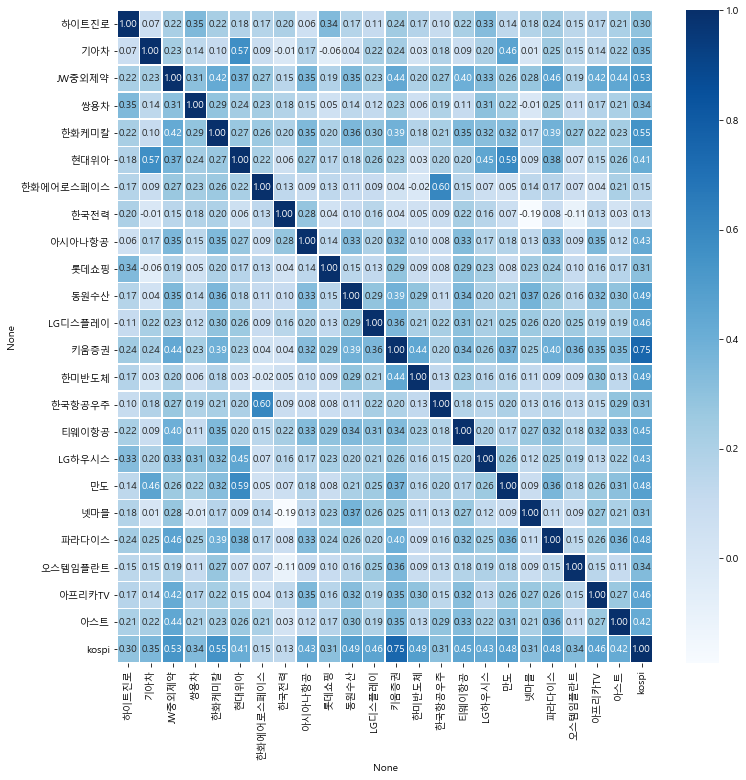

In [50]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(data= prices_corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [55]:
halftableLis1 = tableList[25:50]

In [56]:
selectdf2 = masterdf[masterdf['종목명'].isin(halftableLis1)]

In [57]:
tickers = list(selectdf2['단축코드'])
tickers.append('ks11')
tickername = list(selectdf2['종목명'])
tickername.append('kospi')

In [58]:
start = "2010-01-03"
all_data = {}
for ticker in tqdm_notebook(tickers, desc="ticker종가", mininterval=1):
    all_data[ticker] = fdr.DataReader(ticker,start).Close

In [59]:
prices = pd.DataFrame(all_data)
prices.columns = [tickername]

In [60]:
prices_corr = prices.pct_change().dropna().corr()

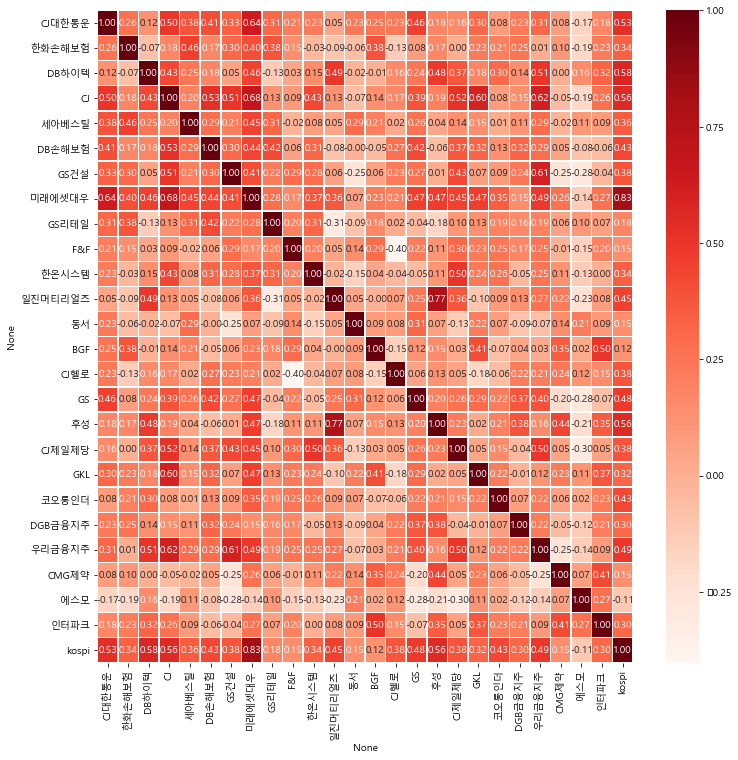

In [61]:
plt.figure(figsize=(12,12))
sns.heatmap(data= prices_corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')